In [2]:
import pandas as pd
import json
import numpy as np
import seaborn as sns

I. Data preprocessing

    1. filtering the data according to SN filter
    2. creating df_train and noise
    3. splitting df_tain to X and y
    4. Spliting x and y to x_train, x_test, y_train, y_test
    6. applying normalization method on x and y (scalers)
    7. feature selection/ extraction
    
II. First models: decision tree and random forest

    1. Decision tree regressor
    2. Random forest
    
III. Hyperparameters tuning

    1. Randomized search
    2. Gridsearch
    
IV. Multi-output model using set parameters

    1. basic multi-output (score=0.65)
    2. Reactivity preediction of Xtrain as predicted_reactivity (score=0.72)
    3. Deagradation ph10 prediction of Xtrain as predicted_pH10 (score=0.72)
    4. Use of predicted values of Xtrain to predict the rest of the degradation conditions (score=0.68)


# Data preprocessing

In [3]:
df = pd.read_csv(r'C:\Users\majac\Desktop\Kaggle COVID-19 mRNA\intermediate csv files\RNA_DF_AfterExplode_dumies3.csv')
# df = pd.read_csv(r'C:\Users\majac\Desktop\Kaggle COVID-19 mRNA\intermediate csv files\RNA_DF_AfterExplode_cat2.csv')
df_filtered = df.loc[df['SN_filter'] ==1]
df_filtered.describe()

,Unnamed: 0,GC content,MFE value,SN_filter,average paired prob,signal_to_noise,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,...,nucleotide_Minus1_U,nucleotide_Minus1_start,nucleotide_Plus2_A,nucleotide_Plus2_C,nucleotide_Plus2_G,nucleotide_Plus2_U,nucleotide_Plus1_A,nucleotide_Plus1_C,nucleotide_Plus1_G,nucleotide_Plus1_U
count,108052.000000,108052.000000,108052.000000,108052.0,108052.000000,108052.000000,108052.000000,108052.000000,108052.000000,108052.000000,...,108052.000000,108052.000000,108052.000000,108052.000000,108052.000000,108052.000000,108052.000000,108052.000000,108052.000000,108052.000000
mean,81500.709566,0.460926,-30.797011,1.0,0.353893,5.402215,0.091712,0.118639,0.135587,0.100988,...,0.164384,0.014706,0.355431,0.209399,0.265853,0.169317,0.352515,0.205410,0.276663,0.165411
std,47498.236967,0.093389,12.647558,0.0,0.091110,2.524015,0.087664,0.121719,0.116206,0.093033,...,0.370625,0.120373,0.478646,0.406882,0.441789,0.375033,0.477756,0.404003,0.447351,0.371553
min,0.000000,0.158879,-67.100000,1.0,0.095295,0.993000,0.001900,0.007200,0.008300,0.004100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39796.750000,0.401869,-39.200000,1.0,0.299214,3.484000,0.037100,0.051300,0.065100,0.045100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,81497.500000,0.467290,-31.100000,1.0,0.356516,5.222000,0.065800,0.082900,0.100200,0.073700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,123198.250000,0.523364,-21.900000,1.0,0.414570,6.853000,0.115300,0.141200,0.163100,0.123000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,163199.000000,0.728972,-1.500000,1.0,0.585009,17.194000,2.899500,4.219100,2.096900,1.918600,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__overlook__

_Most of the data is in the range of 0-1, the degradation rates under the different conditions seem to be corelated_

C:\Users\majac\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reactivity', ylabel='Density'>

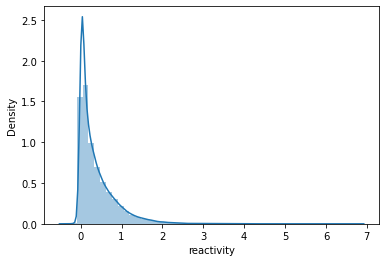

In [231]:
sns.distplot(df_filtered['reactivity'])

In [4]:
df_train = df_filtered.drop(columns = ['reactivity_error', 'deg_error_Mg_pH10', 'deg_error_pH10',
       'deg_error_Mg_50C', 'deg_error_50C', 'SN_filter', 'signal_to_noise', 'Unnamed: 0'])
df_noise = df[['reactivity_error', 'deg_error_Mg_pH10', 'deg_error_pH10',
       'deg_error_Mg_50C', 'deg_error_50C', 'SN_filter', 'signal_to_noise']]

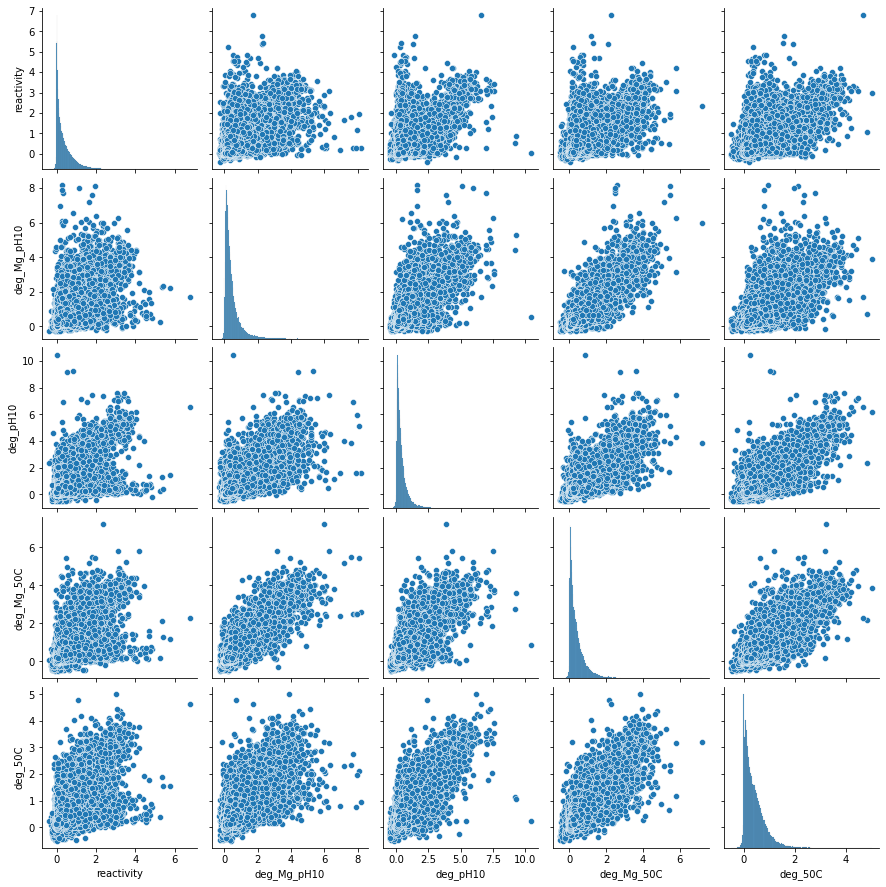

In [252]:
a = df_train[['reactivity', 'deg_Mg_pH10','deg_pH10', 'deg_Mg_50C', 'deg_50C']]
sns.pairplot(a)

In [94]:
# y = df_train[['reactivity', 'deg_Mg_pH10','deg_pH10', 'deg_Mg_50C', 'deg_50C']]
y = df_train[['reactivity']]
X = df_train.drop(columns = ['reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C'] )

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=60)


__Feature selection based on feature importance__

C:\Users\majac\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Feature ranking:
1. feature loc in sequence 0.14083493273907993
2. feature distance from structured RNA 0.13884990316215934
3. feature nucleotide_Plus1 0.1102620137354404
4. feature Average pair prob 0.10602099140855453
5. feature MFE value 0.0860607531841717
6. feature nucleotide pairing 0.07582268964094906
7. feature structure_number 0.06574982333194539
8. feature rnaplfold 0.06346033148223185
9. feature GC content 0.0565397690042558
10. feature sequence 0.048537534399455004
11. feature nucleotide_Plus2 0.03738219947195449
12. feature nucleotide_Minus1 0.030179526223698235
13. feature nucleotide_Minus2 0.022462336217167478
14. feature predicted_loop_type 0.0178371959989367


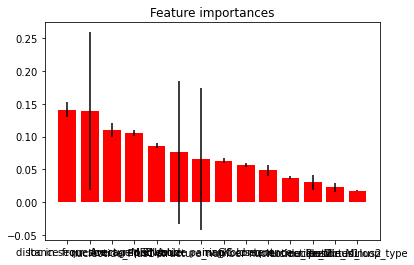

In [59]:
forest = RandomForestRegressor(max_depth=30, random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

label_indices = []
for index in indices:
    label_indices.append(X_train.columns[index])
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} {}" .format(f + 1, label_indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), label_indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# y = df_train[['reactivity', 'deg_Mg_pH10','deg_pH10', 'deg_Mg_50C', 'deg_50C']]

y = df_train[['reactivity']]

X = df_train.drop(columns = ['reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C'] )

# X = df_train[['loc in sequence',
#  'distance from structured RNA',
#  'nucleotide_Plus1',
#  'Average pair prob',
#  'MFE value',
#  'nucleotide pairing',
#  'structure_number',
#  'rnaplfold',
#  'GC content']]

# X = df_train.drop(columns = ['reactivity', 'deg_Mg_pH10',
#        'deg_pH10', 'deg_Mg_50C', 'deg_50C', 'loc in sequence'] )

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=60)


__Scaling of the data__

In [6]:
from sklearn import preprocessing

st_sc_y = preprocessing.StandardScaler()
y_std_scTrain = st_sc_y.fit_transform(y_train)
y_std_scTest = st_sc_y.transform(y_test)
# sns.histplot(y_std_scTrain)

minmax_sc_y = preprocessing.MinMaxScaler()
y_minmaxTrain = minmax_sc_y.fit_transform(y_train)
y_minmaxTest = minmax_sc_y.transform(y_test)
# sns.histplot(y_minmaxTrain)

quant_sc_y = preprocessing.QuantileTransformer(output_distribution='normal')
y_quantileTrain = quant_sc_y.fit_transform(y_train)
y_quantileTest = quant_sc_y.transform(y_test)
# sns.histplot(y_quantileTrain)

k = 'kmeans'
q = 'quantile'
dis = preprocessing.KBinsDiscretizer(n_bins=50, encode='ordinal', strategy=k)
y_discreteTrain = dis.fit_transform(y_train)
y_discreteTest = dis.transform(y_test)
dis_st_sc_y = preprocessing.StandardScaler()
y_dis_std_scTrain = dis_st_sc_y.fit_transform(y_train)
y_dis_std_scTest = dis_st_sc_y.transform(y_test)
# sns.histplot(y_dis_std_scTrain)


# sns.histplot(y_discreteTrain)


from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_s = sc_x.fit_transform(X_train)
X_test_s = sc_x.transform(X_test)


# __First models: Decision Tree Regressor and random forest__

__1. Decision tree regressor__

In [101]:
from sklearn.tree import DecisionTreeRegressor


y_Train_transform = [y_std_scTrain, y_minmaxTrain, y_quantileTrain, y_discreteTrain, y_dis_std_scTrain, y_train]
y_test_transform = [y_std_scTest, y_minmaxTest, y_quantileTest, y_discreteTest,y_dis_std_scTest,  y_test ]
method_index = 5
XTrain_regr = X_train
XTest_regr = X_test

# max_depth = 50, max_features= 20, min_samples_leaf= 20
# max_depth=50, max_features=20, min_samples_leaf=10

regr = DecisionTreeRegressor(criterion= 'mse', max_depth=50, max_features=30, min_samples_leaf=10)
regr = regr.fit(XTrain_regr, y_Train_transform[method_index])

accuracies = cross_val_score(estimator = regr, X = XTrain_regr, y = y_Train_transform[method_index], cv = 10)
print(accuracies)

# y_pred = regr.predict(XTrain_regr)
score_pred = regr.score(XTest_regr, y_test_transform[method_index])
score_train = regr.score(XTrain_regr, y_Train_transform[method_index])
print('The score of the prediction is {} \nThe score of the training set is {}'.format(score_pred, score_train))

[0.62129681 0.60161238 0.61418648 0.58320078 0.57805678 0.60110447
 0.62249856 0.61569948 0.59649594 0.59375591]
The score of the prediction is 0.613185294027176 
The score of the training set is 0.7640571216038715


Text(0.5, 1.0, 'score:0.6300143233791626')

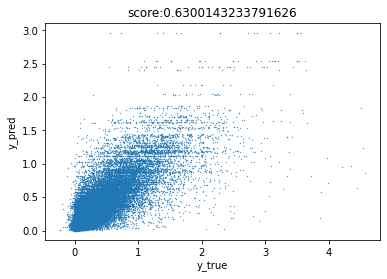

In [15]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
model = [st_sc_y, minmax_sc_y, quant_sc_y, dis, dis_st_sc_y]
y_pred_T = regr.predict(XTest_regr)
y_pred = y_pred_T
# y_pred = model[method_index].inverse_transform(y_pred_T.reshape(-1, 1))
r2_score = r2_score(y_test, y_pred)
s=0.1
fig, ax = plt.subplots()
plt.scatter(y_test,y_pred,s)
ax.set_ylabel("y_pred")
ax.set_xlabel("y_true")
plt.title('score:{}'.format(r2_score))
# plt.xlim(0, 4)
# plt.ylim(0, 4)

__2. Random Forest Regressor__

In [196]:
from sklearn.ensemble import RandomForestRegressor

"""
'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}
"""

y_Train_transform = [y_std_scTrain, y_minmaxTrain, y_quantileTrain, y_discreteTrain, y_dis_std_scTrain, y_train.values.ravel()]
y_test_transform = [y_std_scTest, y_minmaxTest, y_quantileTest, y_discreteTest,y_dis_std_scTest,  y_test.values.ravel()]
method_index = 0
XTrain_regr = X_train
XTest_regr = X_test

regr = RandomForestRegressor(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= None,
 bootstrap= False)
regr = regr.fit(XTrain_regr, y_Train_transform[method_index])

accuracies = cross_val_score(estimator = regr, X = XTrain_regr, y = y_Train_transform[method_index], cv = 10)
print(accuracies)

# y_pred = regr.predict(XTrain_regr)
score_pred = regr.score(XTest_regr, y_test_transform[method_index])
score_train = regr.score(XTrain_regr, y_Train_transform[method_index])
print('The score of the prediction is {} \nThe score of the training set is {}'.format(score_pred, score_train))


C:\Users\majac\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

[0.71737724 0.71878602 0.73083538 0.70879265 0.7171687  0.72427463
 0.74654239 0.71869367 0.71277507 0.70890077]
The score of the prediction is 0.7249410011083497 
The score of the training set is 1.0


Text(0.5, 1.0, 'score:0.7249410011083498')

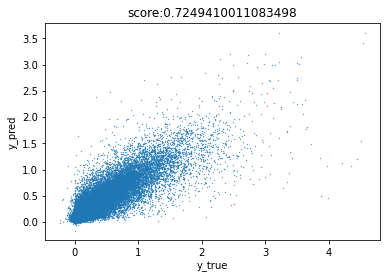

In [198]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
model = [st_sc_y, minmax_sc_y, quant_sc_y, dis, dis_st_sc_y]
y_pred_T = regr.predict(XTest_regr)
# y_pred = y_pred_T
y_pred = model[method_index].inverse_transform(y_pred_T.reshape(-1, 1))
r2_score = r2_score(y_test, y_pred)
s=0.1
fig, ax = plt.subplots()
plt.scatter(y_test,y_pred,s)
ax.set_ylabel("y_pred")
ax.set_xlabel("y_true")
plt.title('score:{}'.format(r2_score))
# plt.xlim(0, 4)
# plt.ylim(0, 4)

# __Randomized search and gridsearch for hyperparameter tuning__

In [136]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [137]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 183.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 430.2min finished
C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [202]:
print(rf_random.best_params_)
best_random = rf_random.best_estimator_
predictions = best_random.predict(X_test)
score_pred = best_random.score(X_test, y_test)
print('the best score is:{}'.format(score_pred))

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
the best score is:0.7252418875532869


In [209]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [ None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2, 3, 4, 5],
    'min_samples_split': [1,2,3,4,5],
    'n_estimators': [300,400, 500]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 3, return_train_score=True)

grid_search.fit(X_train, y_train)
print('grid best parameters are: {} and gris beat score is:{}'.format(grid.best_params_ , grid.best_score_))


In [218]:
best_grid = grid_search.best_estimator_
predictions = best_grid.predict(X_test)
score_pred = best_grid.score(X_test, y_test)
print('The best score is:{}\n The best paramterers are: {}'.format(score_pred, grid_search.best_params_) )

The best score is:0.7250290192485185
 The best paramterers are: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}


# Multi-output model


In [243]:
y = df_train[['reactivity', 'deg_Mg_pH10','deg_pH10', 'deg_Mg_50C', 'deg_50C']]
# y = df_train[['reactivity']]
X = df_train.drop(columns = ['reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C'] )

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=60)
len(X_train), len(y_train)

(75636, 75636)

In [244]:
from sklearn import preprocessing

st_sc_y = preprocessing.StandardScaler()
y_std_scTrain = st_sc_y.fit_transform(y_train)
y_std_scTest = st_sc_y.transform(y_test)
# sns.histplot(y_std_scTrain)

y_std_scTrain

array([[ 0.50845183,  0.41312349, -0.12948423,  0.39243317,  0.2173084 ],
       [-0.17377655, -0.56441813, -0.34881766,  0.42059721, -0.45523532],
       [-0.1906623 , -0.08190251,  0.49371796, -0.12606891,  2.0388005 ],
       ...,
       [-0.28802951, -0.50436832, -0.4779924 , -0.04279249, -0.07069028],
       [-0.47662367,  1.12275057, -0.0681482 ,  0.59566004,  0.48796624],
       [-0.63824447, -0.7295551 , -0.76463729, -0.45188029, -1.03966878]])

In [237]:
from sklearn.ensemble import RandomForestRegressor

"""
'n_estimators': 400,b
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}
"""

y_Train_transform = [y_std_scTrain, y_minmaxTrain, y_quantileTrain, y_discreteTrain, y_dis_std_scTrain, y_train]
y_test_transform = [y_std_scTest, y_minmaxTest, y_quantileTest, y_discreteTest, y_dis_std_scTest,  y_test]
method_index = 0
XTrain_regr = X_train
XTest_regr = X_test

regr = RandomForestRegressor(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= None,
 bootstrap= False)
regr = regr.fit(XTrain_regr, y_Train_transform[method_index])

accuracies = cross_val_score(estimator = regr, X = XTrain_regr, y = y_Train_transform[method_index], cv = 10)
print(accuracies)

# y_pred = regr.predict(XTrain_regr)
score_pred = regr.score(XTest_regr, y_test_transform[method_index])
score_train = regr.score(XTrain_regr, y_Train_transform[method_index])
print('The score of the prediction is {} \nThe score of the training set is {}'.format(score_pred, score_train))


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\majac\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\majac\anaconda3\lib\site-packages\joblib\parallel.py", line 1051, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\majac\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\majac\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\majac\an

C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\majac\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\majac\anaconda3\lib\site-packages\joblib\parallel.py", line 1051, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\majac\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\majac\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\majac\an

C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\majac\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\majac\anaconda3\lib\site-packages\joblib\parallel.py", line 1051, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\majac\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\majac\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\majac\an

[nan nan nan nan nan nan nan nan nan nan]
The score of the prediction is 0.6822313849438926 
The score of the training set is 1.0


Text(0.5, 1.0, 'score:0.6822313849438928')

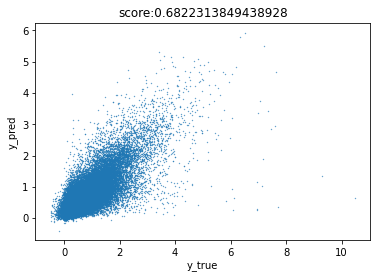

In [239]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
model = [st_sc_y, minmax_sc_y, quant_sc_y, dis, dis_st_sc_y]
y_pred_T = regr.predict(XTest_regr)
# y_pred = y_pred_T
y_pred = model[method_index].inverse_transform(y_pred_T.reshape(-1, 5))
r2_score = r2_score(y_test, y_pred)
s=0.1
fig, ax = plt.subplots()
plt.scatter(y_test,y_pred,s)
ax.set_ylabel("y_pred")
ax.set_xlabel("y_true")
plt.title('score:{}'.format(r2_score))
# plt.xlim(0, 4)
# plt.ylim(0, 4)

__randomized search for multi output model__

In [245]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);



print(rf_random.best_params_)
best_random = rf_random.best_estimator_
predictions = best_random.predict(X_test)
score_pred = best_random.score(X_test, y_test)
print('the best score is:{}'.format(score_pred))

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 49.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 236.7min
C:\Users\majac\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


MemoryError: Unable to allocate 1.92 MiB for an array with shape (50424, 5, 1) and data type float64

Predict the stability values searately and then using linear regression to evaluate one another.
Reactivity score = 0.72

1. Reactivity (score = 0.72)
2. deg_Mg_pH10
3. deg_pH10
4. deg_Mg_50C
5. deg_50C

Predict the stability values searately and then using linear regression to evaluate one another.
Reactivity score = 0.72

1. Reactivity (score = 0.72)
2. deg_Mg_pH10 (score = 0.62)==> to improve
3. deg_pH10 (score = 0.72)
4. deg_Mg_50C (score = 0.66)==> to improve
5. deg_50C (score = 0.62)==> to improve

In [9]:
y = df_train[['deg_Mg_pH10']]
X = df_train.drop(columns = ['reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C'] )

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=60)
len(X_train), len(y_train)

(75636, 75636)

In [12]:
# y = df_train[['reactivity', 'deg_Mg_pH10','deg_pH10', 'deg_Mg_50C', 'deg_50C']]
y = df_train[['deg_Mg_pH10']]
X = df_train.drop(columns = ['reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C'] )

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=60)
len(X_train), len(y_train)

from sklearn.ensemble import RandomForestRegressor

"""
'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False
 
 'bootstrap': False, 
 'max_depth': None, 
 'max_features': 'sqrt', 
 'min_samples_leaf': 1, 
 'min_samples_split': 3, 
 'n_estimators': 500
"""

y_Train_transform = [y_std_scTrain, y_minmaxTrain, y_quantileTrain, y_discreteTrain, y_dis_std_scTrain, y_train.values.ravel()]
y_test_transform = [y_std_scTest, y_minmaxTest, y_quantileTest, y_discreteTest,y_dis_std_scTest,  y_test.values.ravel()]
method_index = 5
XTrain_regr = X_train
XTest_regr = X_test

regr = RandomForestRegressor(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 35,
 bootstrap= False)
regr = regr.fit(XTrain_regr, y_Train_transform[method_index])

accuracies = cross_val_score(estimator = regr, X = XTrain_regr, y = y_Train_transform[method_index], cv = 10)
print(accuracies)

# y_pred = regr.predict(XTrain_regr)
score_pred = regr.score(XTest_regr, y_test_transform[method_index])
score_train = regr.score(XTrain_regr, y_Train_transform[method_index])
print('The score of the prediction is {} \nThe score of the training set is {}'.format(score_pred, score_train))

[0.64644691 0.62306929 0.65088524 0.64014299 0.64769391 0.64331867
 0.64033728 0.6758533  0.64887684 0.60819846]
The score of the prediction is 0.6183822952453774 
The score of the training set is 0.9149646316006783


__randomized search__

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              verbose=5, random_state=42,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);



print(rf_random.best_params_)
best_random = rf_random.best_estimator_
predictions = best_random.predict(X_test)
score_pred = best_random.score(X_test, y_test)
print('the best score is:{}'.format(score_pred))

{'n_estimators': [200, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.153, test=-0.191), total=  29.6s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.1s remaining:    0.0s
C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.154, test=-0.189), total=  28.9s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s
C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.154, test=-0.188), total=  28.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s
C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.153, test=-0.190), total=  29.2s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.2min remaining:    0.0s
C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.153, test=-0.192), total=  29.9s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.205, test=-0.214), total=  25.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.205, test=-0.212), total=  27.2s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.205, test=-0.210), total=  26.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.204, test=-0.215), total=  27.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.204, test=-0.215), total=  26.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.083, test=-0.184), total=  26.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.084, test=-0.181), total=  25.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.084, test=-0.179), total=  25.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.081, test=-0.183), total=  25.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.083, test=-0.184), total=  25.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.125, test=-0.187), total=  16.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.126, test=-0.185), total=  16.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.126, test=-0.183), total=  16.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.125, test=-0.186), total=  17.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.125, test=-0.187), total=  16.6s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.000, test=-0.182), total= 1.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.000, test=-0.180), total= 1.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.000, test=-0.179), total= 1.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.000, test=-0.183), total= 1.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.000, test=-0.183), total= 1.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, score=(train=-0.192, test=-0.205), total= 1.6min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, score=(train=-0.193, test=-0.204), total= 1.6min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, score=(train=-0.193, test=-0.201), total= 1.6min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, score=(train=-0.192, test=-0.206), total= 1.6min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, score=(train=-0.192, test=-0.207), total= 1.6min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.154, test=-0.191), total=  15.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.154, test=-0.189), total=  15.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.154, test=-0.188), total=  15.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.153, test=-0.190), total=  15.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=35, bootstrap=True, score=(train=-0.153, test=-0.192), total=  15.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.066, test=-0.244), total= 2.3min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.066, test=-0.245), total= 2.4min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.065, test=-0.242), total= 2.3min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.067, test=-0.242), total= 2.3min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.066, test=-0.245), total= 2.4min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.087, test=-0.185), total= 3.0min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.087, test=-0.184), total= 2.9min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.087, test=-0.183), total= 2.8min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.087, test=-0.186), total= 3.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.087, test=-0.188), total= 2.8min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False, score=(train=-0.054, test=-0.251), total= 4.4min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False, score=(train=-0.054, test=-0.251), total= 4.5min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False, score=(train=-0.053, test=-0.245), total= 4.4min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False, score=(train=-0.053, test=-0.247), total= 4.5min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=False, score=(train=-0.053, test=-0.249), total= 4.5min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.075, test=-0.243), total= 2.1min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.076, test=-0.244), total= 2.2min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.075, test=-0.240), total= 2.1min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.075, test=-0.240), total= 2.1min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.074, test=-0.244), total= 2.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.119, test=-0.186), total= 2.5min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.119, test=-0.185), total= 2.5min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.119, test=-0.183), total= 2.5min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.119, test=-0.186), total= 2.5min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.119, test=-0.189), total= 2.5min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.154, test=-0.191), total=  14.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.154, test=-0.189), total=  14.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.154, test=-0.188), total=  14.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.153, test=-0.190), total=  14.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.153, test=-0.192), total=  14.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=(train=-0.058, test=-0.182), total=  52.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=(train=-0.058, test=-0.181), total=  53.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=(train=-0.059, test=-0.179), total=  52.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=(train=-0.058, test=-0.183), total=  52.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=(train=-0.058, test=-0.183), total=  53.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, score=(train=-0.119, test=-0.186), total= 1.2min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, score=(train=-0.120, test=-0.186), total= 1.3min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, score=(train=-0.120, test=-0.183), total= 1.2min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, score=(train=-0.119, test=-0.187), total= 1.3min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, score=(train=-0.119, test=-0.189), total= 1.2min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.000, test=-0.254), total= 2.4min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.000, test=-0.253), total= 2.4min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.000, test=-0.248), total= 2.4min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.000, test=-0.250), total= 2.5min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.000, test=-0.252), total= 2.5min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, score=(train=-0.191, test=-0.205), total= 1.6min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, score=(train=-0.191, test=-0.204), total= 1.6min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, score=(train=-0.192, test=-0.201), total= 1.6min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, score=(train=-0.190, test=-0.206), total= 1.6min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, score=(train=-0.191, test=-0.207), total= 1.6min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.117, test=-0.230), total= 1.9min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.119, test=-0.231), total= 1.9min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.118, test=-0.227), total= 1.9min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.118, test=-0.230), total= 2.0min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=85, bootstrap=False, score=(train=-0.117, test=-0.231), total= 2.0min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.130, test=-0.188), total=  43.2s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.131, test=-0.185), total=  42.9s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.131, test=-0.183), total=  43.0s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.129, test=-0.186), total=  43.0s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.130, test=-0.188), total=  43.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.085, test=-0.187), total= 2.8min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.085, test=-0.186), total= 2.9min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.085, test=-0.184), total= 2.8min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.085, test=-0.187), total= 2.9min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.084, test=-0.189), total= 2.9min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, score=(train=-0.054, test=-0.251), total= 4.4min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, score=(train=-0.054, test=-0.251), total= 4.5min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, score=(train=-0.053, test=-0.245), total= 4.4min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, score=(train=-0.053, test=-0.247), total= 4.4min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, score=(train=-0.053, test=-0.249), total= 4.5min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=True, score=(train=-0.068, test=-0.184), total=  22.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=True, score=(train=-0.068, test=-0.182), total=  22.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=True, score=(train=-0.068, test=-0.180), total=  22.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=True, score=(train=-0.068, test=-0.184), total=  22.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=True, score=(train=-0.068, test=-0.185), total=  22.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.121, test=-0.187), total=  33.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.121, test=-0.185), total=  33.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.122, test=-0.183), total=  33.0s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.121, test=-0.186), total=  33.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.121, test=-0.187), total=  33.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, score=(train=-0.130, test=-0.188), total=  21.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, score=(train=-0.131, test=-0.185), total=  21.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, score=(train=-0.131, test=-0.184), total=  21.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, score=(train=-0.129, test=-0.186), total=  21.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, score=(train=-0.130, test=-0.188), total=  21.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.069, test=-0.187), total= 3.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.069, test=-0.186), total= 3.2min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.069, test=-0.184), total= 3.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.069, test=-0.187), total= 3.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=85, bootstrap=True, score=(train=-0.069, test=-0.189), total= 3.1min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False, score=(train=-0.117, test=-0.230), total= 1.9min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False, score=(train=-0.119, test=-0.231), total= 2.0min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False, score=(train=-0.118, test=-0.227), total= 1.9min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False, score=(train=-0.118, test=-0.230), total= 2.0min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=110, bootstrap=False, score=(train=-0.117, test=-0.231), total= 2.0min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.154, test=-0.191), total=  14.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.154, test=-0.189), total=  14.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.154, test=-0.188), total=  14.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.153, test=-0.190), total=  14.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.153, test=-0.192), total=  14.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.199, test=-0.217), total= 2.3min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.200, test=-0.216), total= 2.3min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.199, test=-0.211), total= 2.3min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.199, test=-0.218), total= 2.3min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.199, test=-0.219), total= 2.4min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.105, test=-0.185), total=  34.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.106, test=-0.184), total=  35.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.106, test=-0.182), total=  35.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.105, test=-0.185), total=  34.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.105, test=-0.186), total=  34.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=(train=-0.068, test=-0.184), total=  21.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=(train=-0.068, test=-0.182), total=  21.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=(train=-0.068, test=-0.180), total=  22.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=(train=-0.068, test=-0.184), total=  22.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, score=(train=-0.068, test=-0.185), total=  22.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, score=(train=-0.087, test=-0.185), total= 2.8min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, score=(train=-0.087, test=-0.184), total= 2.7min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, score=(train=-0.087, test=-0.183), total= 2.8min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, score=(train=-0.087, test=-0.186), total= 2.8min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=True, score=(train=-0.087, test=-0.188), total= 2.8min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.083, test=-0.184), total=  50.9s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.083, test=-0.181), total=  50.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.084, test=-0.179), total=  50.6s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.081, test=-0.183), total=  50.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.083, test=-0.184), total=  50.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.200, test=-0.216), total= 1.2min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.202, test=-0.214), total= 1.2min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.201, test=-0.211), total= 1.2min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.200, test=-0.218), total= 1.2min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.201, test=-0.218), total= 1.2min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.130, test=-0.188), total=  21.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.131, test=-0.185), total=  21.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.131, test=-0.184), total=  20.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.129, test=-0.186), total=  21.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.130, test=-0.188), total=  21.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.058, test=-0.182), total=  52.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.058, test=-0.181), total=  53.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.059, test=-0.179), total=  53.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.058, test=-0.183), total=  52.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=35, bootstrap=False, score=(train=-0.058, test=-0.183), total=  52.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.000, test=-0.254), total= 2.4min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.000, test=-0.253), total= 2.5min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.000, test=-0.248), total= 2.4min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.000, test=-0.250), total= 2.5min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.000, test=-0.252), total= 2.5min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.058, test=-0.182), total=  52.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.058, test=-0.181), total=  57.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.059, test=-0.179), total=  53.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.058, test=-0.183), total=  52.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.058, test=-0.183), total=  53.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.153, test=-0.191), total=  30.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.154, test=-0.189), total=  28.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.154, test=-0.188), total=  28.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.153, test=-0.190), total=  29.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.153, test=-0.192), total=  28.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, score=(train=-0.117, test=-0.230), total= 1.9min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, score=(train=-0.119, test=-0.231), total= 2.0min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, score=(train=-0.118, test=-0.227), total= 1.9min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, score=(train=-0.118, test=-0.230), total= 2.0min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, score=(train=-0.117, test=-0.231), total= 2.0min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.153, test=-0.191), total=  28.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.154, test=-0.189), total=  28.9s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.154, test=-0.188), total=  28.9s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.153, test=-0.190), total=  28.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, score=(train=-0.153, test=-0.192), total=  28.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.207, test=-0.215), total=  24.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.207, test=-0.213), total=  24.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.208, test=-0.211), total=  24.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.205, test=-0.215), total=  25.0s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.206, test=-0.216), total=  24.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.058, test=-0.183), total=  26.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.058, test=-0.181), total=  26.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.059, test=-0.179), total=  26.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.058, test=-0.183), total=  26.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.058, test=-0.183), total=  26.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.200, test=-0.216), total= 2.3min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.202, test=-0.214), total= 2.3min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.201, test=-0.211), total= 2.3min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.200, test=-0.218), total= 2.3min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.201, test=-0.218), total= 2.4min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.068, test=-0.184), total=  21.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.068, test=-0.182), total=  23.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.068, test=-0.180), total=  22.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.068, test=-0.184), total=  23.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=(train=-0.068, test=-0.185), total=  23.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.092, test=-0.186), total= 1.4min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.093, test=-0.185), total= 1.4min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.093, test=-0.183), total= 1.4min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.093, test=-0.187), total= 1.4min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.092, test=-0.188), total= 1.4min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, score=(train=-0.208, test=-0.215), total=   8.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, score=(train=-0.208, test=-0.213), total=   9.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, score=(train=-0.208, test=-0.211), total=   8.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, score=(train=-0.206, test=-0.214), total=   8.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, score=(train=-0.207, test=-0.216), total=   8.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.069, test=-0.187), total= 1.6min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.070, test=-0.186), total= 1.6min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.070, test=-0.185), total= 1.6min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.069, test=-0.188), total= 1.6min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=35, bootstrap=True, score=(train=-0.069, test=-0.189), total= 1.6min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.205, test=-0.214), total=  12.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.206, test=-0.213), total=  12.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.206, test=-0.210), total=  12.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.204, test=-0.214), total=  12.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.204, test=-0.216), total=  12.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.197, test=-0.217), total= 1.2min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.198, test=-0.215), total= 1.2min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.199, test=-0.211), total= 1.2min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.198, test=-0.218), total= 1.2min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=(train=-0.198, test=-0.219), total= 1.2min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.207, test=-0.215), total=  24.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.207, test=-0.213), total=  24.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.208, test=-0.211), total=  24.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.205, test=-0.215), total=  24.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, score=(train=-0.206, test=-0.216), total=  24.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.130, test=-0.188), total=  43.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.131, test=-0.185), total=  42.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.131, test=-0.183), total=  43.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.129, test=-0.186), total=  42.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=85, bootstrap=False, score=(train=-0.130, test=-0.188), total=  43.2s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.000, test=-0.182), total= 1.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.000, test=-0.181), total= 1.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.000, test=-0.179), total= 1.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.000, test=-0.183), total= 1.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, score=(train=-0.000, test=-0.183), total= 1.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, score=(train=-0.069, test=-0.187), total= 3.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, score=(train=-0.069, test=-0.186), total= 3.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, score=(train=-0.069, test=-0.184), total= 3.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, score=(train=-0.069, test=-0.187), total= 3.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, score=(train=-0.069, test=-0.189), total= 3.1min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, score=(train=-0.058, test=-0.182), total=  52.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, score=(train=-0.058, test=-0.181), total=  53.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, score=(train=-0.059, test=-0.179), total=  52.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, score=(train=-0.058, test=-0.183), total=  54.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, score=(train=-0.058, test=-0.183), total=  53.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.066, test=-0.244), total= 4.3min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.066, test=-0.245), total= 4.3min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.065, test=-0.242), total= 4.3min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.067, test=-0.242), total= 4.4min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.066, test=-0.245), total= 4.4min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.117, test=-0.230), total= 3.9min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.119, test=-0.231), total= 4.0min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.118, test=-0.227), total= 3.9min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.118, test=-0.230), total= 4.0min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=35, bootstrap=False, score=(train=-0.117, test=-0.231), total= 4.0min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=(train=-0.000, test=-0.182), total= 1.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=(train=-0.000, test=-0.181), total= 1.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\Users\majac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 

In [254]:
# y = df_train[['reactivity', 'deg_Mg_pH10','deg_pH10', 'deg_Mg_50C', 'deg_50C']]
y = df_train[['deg_pH10']]
X = df_train.drop(columns = ['reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C'] )

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=60)
len(X_train), len(y_train)

from sklearn.ensemble import RandomForestRegressor

"""
'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False
 
 'bootstrap': False, 
 'max_depth': None, 
 'max_features': 'sqrt', 
 'min_samples_leaf': 1, 
 'min_samples_split': 3, 
 'n_estimators': 500
"""

y_Train_transform = [y_std_scTrain, y_minmaxTrain, y_quantileTrain, y_discreteTrain, y_dis_std_scTrain, y_train.values.ravel()]
y_test_transform = [y_std_scTest, y_minmaxTest, y_quantileTest, y_discreteTest,y_dis_std_scTest,  y_test.values.ravel()]
method_index = 5
XTrain_regr = X_train
XTest_regr = X_test

regr = RandomForestRegressor(n_estimators= 500,
 min_samples_split= 3,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= None,
 bootstrap= False)
regr = regr.fit(XTrain_regr, y_Train_transform[method_index])

accuracies = cross_val_score(estimator = regr, X = XTrain_regr, y = y_Train_transform[method_index], cv = 10)
print(accuracies)

# y_pred = regr.predict(XTrain_regr)
score_pred = regr.score(XTest_regr, y_test_transform[method_index])
score_train = regr.score(XTrain_regr, y_Train_transform[method_index])
print('The score of the prediction is {} \nThe score of the training set is {}'.format(score_pred, score_train))

[0.76801342 0.74026427 0.76969913 0.76619431 0.76240941 0.77113703
 0.76177484 0.78705046 0.74567696 0.74897446]
The score of the prediction is 0.7267092239244399 
The score of the training set is 0.9948140630035351


In [255]:
# y = df_train[['reactivity', 'deg_Mg_pH10','deg_pH10', 'deg_Mg_50C', 'deg_50C']]
y = df_train[['deg_50C']]
X = df_train.drop(columns = ['reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C'] )

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=60)
len(X_train), len(y_train)

from sklearn.ensemble import RandomForestRegressor

"""
'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False
 
 'bootstrap': False, 
 'max_depth': None, 
 'max_features': 'sqrt', 
 'min_samples_leaf': 1, 
 'min_samples_split': 3, 
 'n_estimators': 500
"""

y_Train_transform = [y_std_scTrain, y_minmaxTrain, y_quantileTrain, y_discreteTrain, y_dis_std_scTrain, y_train.values.ravel()]
y_test_transform = [y_std_scTest, y_minmaxTest, y_quantileTest, y_discreteTest,y_dis_std_scTest,  y_test.values.ravel()]
method_index = 5
XTrain_regr = X_train
XTest_regr = X_test

regr = RandomForestRegressor(n_estimators= 500,
 min_samples_split= 3,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= None,
 bootstrap= False)
regr = regr.fit(XTrain_regr, y_Train_transform[method_index])

accuracies = cross_val_score(estimator = regr, X = XTrain_regr, y = y_Train_transform[method_index], cv = 10)
print(accuracies)

# y_pred = regr.predict(XTrain_regr)
score_pred = regr.score(XTest_regr, y_test_transform[method_index])
score_train = regr.score(XTrain_regr, y_Train_transform[method_index])
print('The score of the prediction is {} \nThe score of the training set is {}'.format(score_pred, score_train))

[0.67847118 0.65484262 0.6875594  0.66666892 0.67519565 0.67444551
 0.67533821 0.68626095 0.67019138 0.66271183]
The score of the prediction is 0.6610895735360223 
The score of the training set is 0.9931490659261685


In [256]:
# y = df_train[['reactivity', 'deg_Mg_pH10','deg_pH10', 'deg_Mg_50C', 'deg_50C']]
y = df_train[['deg_Mg_50C']]
X = df_train.drop(columns = ['reactivity', 'deg_Mg_pH10',
       'deg_pH10', 'deg_Mg_50C', 'deg_50C'] )

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=60)
len(X_train), len(y_train)

from sklearn.ensemble import RandomForestRegressor

"""
'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False
 
 'bootstrap': False, 
 'max_depth': None, 
 'max_features': 'sqrt', 
 'min_samples_leaf': 1, 
 'min_samples_split': 3, 
 'n_estimators': 500
"""

y_Train_transform = [y_std_scTrain, y_minmaxTrain, y_quantileTrain, y_discreteTrain, y_dis_std_scTrain, y_train.values.ravel()]
y_test_transform = [y_std_scTest, y_minmaxTest, y_quantileTest, y_discreteTest,y_dis_std_scTest,  y_test.values.ravel()]
method_index = 5
XTrain_regr = X_train
XTest_regr = X_test

regr = RandomForestRegressor(n_estimators= 500,
 min_samples_split= 3,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= None,
 bootstrap= False)
regr = regr.fit(XTrain_regr, y_Train_transform[method_index])

accuracies = cross_val_score(estimator = regr, X = XTrain_regr, y = y_Train_transform[method_index], cv = 10)
print(accuracies)

# y_pred = regr.predict(XTrain_regr)
score_pred = regr.score(XTest_regr, y_test_transform[method_index])
score_train = regr.score(XTrain_regr, y_Train_transform[method_index])
print('The score of the prediction is {} \nThe score of the training set is {}'.format(score_pred, score_train))

[0.70933753 0.68448119 0.70869656 0.70226876 0.6940501  0.70913234
 0.69764494 0.72668668 0.69243258 0.6772892 ]
The score of the prediction is 0.6876438103431075 
The score of the training set is 0.9938349282851349


In [215]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}